# Green Energy Program Grants (GEPG) Data

Description: https://dnrec.alpha.delaware.gov/climate-coastal-energy/renewable/assistance/

Dataset: https://data.delaware.gov/Energy-and-Environment/Green-Energy-Program-Grants/nsgd-n2gb

Reports: https://dnrec.alpha.delaware.gov/climate-coastal-energy/renewable/assistance/

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sodapy import Socrata
import pygris
import PyPDF2
import seaborn as sns
from scipy import stats
pd.options.display.max_columns = 100

In [2]:
client = Socrata("data.delaware.gov", None)
results = client.get("nsgd-n2gb", limit=8000)

GEPG_df = pd.DataFrame.from_records(results)

In [3]:
if (len(GEPG_df) - 7171) > 0:
    print(90*"!")
    print("** Warning: There has been a change in the length of the dataset since September 1, 2023. **")
    print(90*"!")
else:
    print("No update since September 1, 2023.")

No update since September 1, 2023.


In [4]:
myfile = open("/Users/kamran/Downloads/Datasets/Data_Dictionary_for_Green_Energy_Program_Grants.pdf",mode='rb')

In [5]:
pdf_reader = PyPDF2.PdfReader(myfile)

In [6]:
len(pdf_reader.pages)

1

In [7]:
page_one = pdf_reader.pages[0]
print(page_one.extract_text())

Data Dictionary for Dataset:  Green Energy Program Grants  
 
Column  Column Name / Field 
Name  Description  
A Application ID  Unique identifier for each grant application  
B City City in which the project is located  
C Zip Zip code in which the project is located  
D Application Submission Date  Date of submission of grant application  
E Facility Type  Renewable energy source for which grant 
application has been submitted:  PV (photovoltaic), 
Geothermal, Solar Wa ter Heating, Wind  
F Sector  Type of Project:  Residential, Non_Residential, 
Commercial, Non_Profit, Solar Lease, Solar PPA 
(Power Purchase Agreement)  
G PV Capacity (kW)  Size in kilowatts of photovoltaic system  
H Geothermal Capacity (tons)  Size in tons of  geothermal system  
I Wind Capacity (kW)  Size in kilowatts of windpower system  
J Solar Water Capacity (Sq. Ft.)  Size in square feet of solar water heater system  
K Total System Costs ($)  Sum of money spent on renewable energy system  
L Total Rebate  S

In [8]:
page_one_text = page_one.extract_text()

In [9]:
myfile.close()

In [10]:
GEPG_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7171 entries, 0 to 7170
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   application_id               7171 non-null   object
 1   city                         7171 non-null   object
 2   zip                          7170 non-null   object
 3   application_submission_date  7171 non-null   object
 4   facility_type                7170 non-null   object
 5   sector                       7171 non-null   object
 6   pv_capacity_kw               6163 non-null   object
 7   total_system_costs           7161 non-null   object
 8   total_rebate                 7171 non-null   object
 9   payment_status               7171 non-null   object
 10  mounting_location            4952 non-null   object
 11  ppa_lease                    4952 non-null   object
 12  geothermal_capacity_tons     922 non-null    object
 13  solar_water_capacity_sq_ft   63 n

In [11]:
GEPG_df.head()

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,geothermal_capacity_tons,solar_water_capacity_sq_ft,wind_capacity_kw
0,R00437,Bear,19701,2008-07-25T00:00:00.000,PV,Residential,0.3,3194.67,1322.38,Paid,NaN,NaN,NaN,NaN,NaN
1,R00400,Middletown,19709,2008-04-07T00:00:00.000,PV,Residential,0.426,3000.00,903.00,Paid,NaN,NaN,NaN,NaN,NaN
2,R00837,Ocean View,19970,2009-06-18T00:00:00.000,PV,Residential,0.57,4703.00,1175.75,Paid,NaN,NaN,NaN,NaN,NaN
3,R01477,Rehoboth Beach,19971,2012-01-06T00:00:00.000,PV,Residential,0.84,3847.20,1050.00,Paid,NaN,NaN,NaN,NaN,NaN
4,R01176,Middletown,19709,2010-11-30T00:00:00.000,PV,Residential,0.92,5060.00,1265.00,Paid,NaN,NaN,NaN,NaN,NaN


In [12]:
GEPG_df.isnull().sum()

application_id                    0
city                              0
zip                               1
application_submission_date       0
facility_type                     1
sector                            0
pv_capacity_kw                 1008
total_system_costs               10
total_rebate                      0
payment_status                    0
mounting_location              2219
ppa_lease                      2219
geothermal_capacity_tons       6249
solar_water_capacity_sq_ft     7108
wind_capacity_kw               7153
dtype: int64

In [13]:
GEPG_df.isnull().sum()*100/len(GEPG_df)

application_id                  0.000000
city                            0.000000
zip                             0.013945
application_submission_date     0.000000
facility_type                   0.013945
sector                          0.000000
pv_capacity_kw                 14.056617
total_system_costs              0.139451
total_rebate                    0.000000
payment_status                  0.000000
mounting_location              30.944080
ppa_lease                      30.944080
geothermal_capacity_tons       87.142658
solar_water_capacity_sq_ft     99.121461
wind_capacity_kw               99.748989
dtype: float64

# Data Cleaning and Data Engineering

In [14]:
GEPG_df.drop(['geothermal_capacity_tons','solar_water_capacity_sq_ft','wind_capacity_kw'],axis=1,inplace=True)

In [15]:
GEPG_df[GEPG_df['zip'].isnull()]

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease
6172,NR00003,Lost due to Fire,NaN,2003-04-07T00:00:00.000,Geothermal,Non_Residential,NaN,NaN,25000.00,Paid,NaN,NaN


In [16]:
GEPG_df.drop(GEPG_df[GEPG_df['zip'].isnull()].any(axis=1).index,inplace=True)

In [17]:
GEPG_df['Zip5digits'] = GEPG_df['zip'].apply(lambda x: x[:5] )

In [18]:
GEPG_df['Zip5digits']

0       19701
1       19709
2       19970
3       19971
4       19709
        ...  
7166    19930
7167    19930
7168    19707
7169    19930
7170    19944
Name: Zip5digits, Length: 7170, dtype: object

In [19]:
GEPG_df.groupby('Zip5digits').count().sort_values(by='application_id')

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease
Zip5digits,,,,,,,,,,,,
1073,1,1,1,1,1,1,0,1,1,1,0,0
23323,1,1,1,1,1,1,0,1,1,1,0,0
22180,1,1,1,1,1,1,1,1,1,1,1,1
21012,1,1,1,1,1,1,1,1,1,1,1,1
20814,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19702,411,411,411,411,411,411,398,411,411,411,362,362
19720,438,438,438,438,438,438,433,438,438,438,384,384
19701,570,570,570,570,570,570,540,570,570,570,471,471


In [20]:
GEPG_df[GEPG_df['Zip5digits'].astype('int64') >= 20000]

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits
2021,9225,Annapolis,21012,2017-04-23T19:46:00.000,PV,residential,5000,6120,2500,Unpaid,rooftop,owned,21012
2204,5238,Rehoboth Beach,89119,2014-10-16T15:14:00.000,PV,residential,5355,26775,4338.75,Paid,rooftop,lease,89119
3890,8370,Bethany Beach,20814,2017-08-02T17:07:00.000,PV,residential,8250,16900,3300,Paid,rooftop,owned,20814
4310,5287,Bear,94607,2014-10-21T01:24:00.000,PV,residential,9000,35460,5250,Unpaid,rooftop,lease,94607
5160,11627,Ocean View,22180,2022-10-06T11:24:00.000,PV,residential,11200,23632,8000,Unpaid,rooftop,owned,22180
6910,5104,Chesapeake,23323,2020-06-18T16:42:00.000,Wind,non_residential,NaN,8,17750,Unpaid,NaN,NaN,23323


In [21]:
len(GEPG_df[GEPG_df['Zip5digits'].astype('int64') >= 20000])

6

In [22]:
GEPG_df[GEPG_df['Zip5digits'].astype('int64') <= 19700]

,application_id,city,zip,application_submission_date,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits
1531,8812,New Castle,17920,2016-12-20T14:39:00.000,PV,residential,3640,26260,1000,Paid,rooftop,lease,17920
2566,12031,Townsend,17934,2023-03-16T10:01:00.000,PV,residential,5920,28416,4736,Unpaid,rooftop,owned,17934
3308,11110,Newark,19173,2022-03-30T09:08:00.000,PV,residential,7200,75000,5040,Paid,rooftop,owned,19173
3790,12218,South Bethany,19330,2023-02-24T00:21:00.000,PV,residential,8075,24647,6460,Unpaid,rooftop,owned,19330
5303,10039,Newark,19173,2020-07-07T20:10:00.000,PV,residential,11840,45954,5000,Paid,rooftop,owned,19173
5608,11421,Wilmington,18903,2022-08-25T08:59:00.000,PV,residential,13320,79920,5760,Unpaid,rooftop,owned,18903
7155,11333,SOUTHAMPTON,1073,2022-06-23T11:11:00.000,Geothermal,residential,NaN,9400,5000,Unpaid,NaN,NaN,1073


In [23]:
GEPG_df = GEPG_df[(GEPG_df['Zip5digits'].astype('int64') >= 19700) & (GEPG_df['Zip5digits'].astype('int64') < 20000)]

In [24]:
GEPG_df.drop(['application_id','zip'],axis=1,inplace=True)

In [25]:
GEPG_df['date'] = pd.to_datetime(GEPG_df['application_submission_date'])

In [26]:
GEPG_df['year'] = GEPG_df['date'].dt.strftime('%Y')

In [27]:
GEPG_df['month'] = GEPG_df['date'].dt.strftime('%m')

In [28]:
GEPG_df.drop(['application_submission_date'],axis=1,inplace=True)

In [29]:
GEPG_df.drop(GEPG_df[GEPG_df['facility_type'].isnull()].index,axis=0,inplace=True)

<Axes: xlabel='facility_type'>

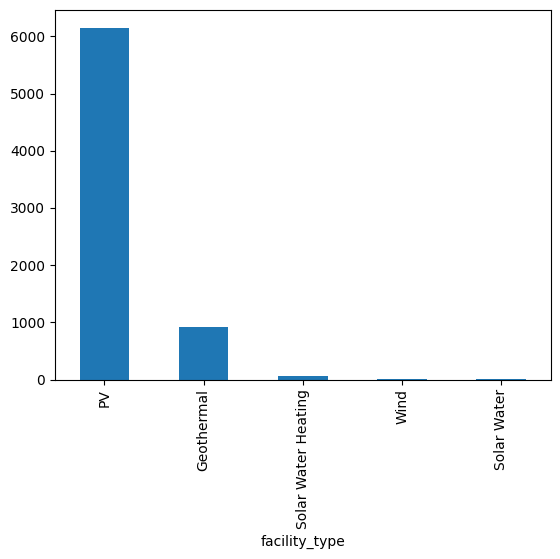

In [30]:
GEPG_df['facility_type'].value_counts().plot.bar()

In [31]:
GEPG_df['sector'] = GEPG_df['sector'].str.lower()

<Axes: xlabel='sector'>

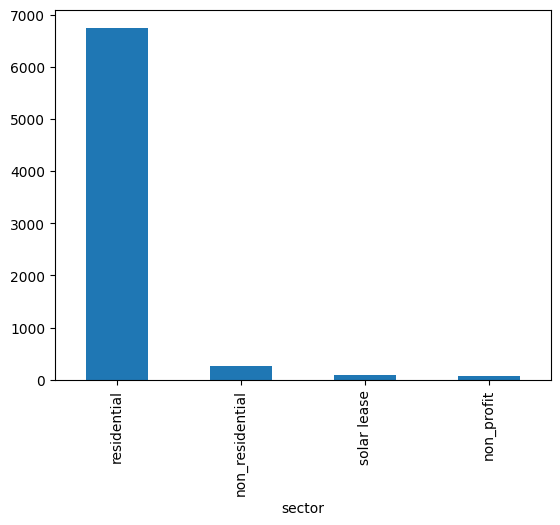

In [32]:
GEPG_df['sector'].value_counts().plot.bar()

In [33]:
GEPG_df.drop(GEPG_df[(GEPG_df['facility_type']=='PV') & 
                     (GEPG_df['pv_capacity_kw'].isnull())].index,axis=0,inplace=True)

In [34]:
GEPG_df['pv_capacity_kw'] = GEPG_df['pv_capacity_kw'].fillna(value=0)

In [35]:
GEPG_df['pv_capacity_kw'] = GEPG_df['pv_capacity_kw'].astype('float')

In [36]:
GEPG_df[GEPG_df['facility_type']=='PV']['pv_capacity_kw'].describe()

count      6152.000000
mean       7779.407645
std       18903.811090
min           0.300000
25%        3671.250000
50%        6760.000000
75%        9620.000000
max      908900.000000
Name: pv_capacity_kw, dtype: float64

In [37]:
GEPG_df['total_system_costs'] = GEPG_df['total_system_costs'].astype('float')

In [38]:
GEPG_df[GEPG_df['total_system_costs'].isnull()]

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month
64,Wilmington,PV,non_residential,2.35,NaN,4993.75,Paid,NaN,NaN,19806,2012-05-09,2012,05
6204,Rehoboth Beach,Geothermal,residential,0.00,NaN,3000.00,Paid,NaN,NaN,19971,2005-03-03,2005,03
6675,Rehoboth Beach,Geothermal,residential,0.00,NaN,3000.00,Paid,NaN,NaN,19971,2010-12-29,2010,12
6709,Newark,Geothermal,non_profit,0.00,NaN,14800.00,Paid,NaN,NaN,19711,2011-06-20,2011,06
6716,Claymont,Geothermal,residential,0.00,NaN,2300.00,Paid,NaN,NaN,19703,2011-07-07,2011,07
6739,Hockessin,Geothermal,residential,0.00,NaN,4400.00,Paid,NaN,NaN,19707,2011-09-12,2011,09
6743,Seaford,Geothermal,residential,0.00,NaN,3700.00,Paid,NaN,NaN,19973,2011-09-19,2011,09
6887,Newark,Geothermal,residential,0.00,NaN,2300.00,Paid,NaN,NaN,19711,2013-09-26,2013,09
6889,Dewey Beach,Geothermal,residential,0.00,NaN,5000.00,Paid,NaN,NaN,19971,2013-10-15,2013,10


In [39]:
GEPG_df.drop(GEPG_df[GEPG_df['total_system_costs'].isnull()].index,axis=0,inplace=True)

In [40]:
GEPG_df['total_rebate'] = GEPG_df['total_rebate'].astype('float')

In [41]:
GEPG_df['payment_status'] = GEPG_df['payment_status'].str.lower()

In [42]:
GEPG_df['payment_status'].value_counts()

payment_status
paid           5503
unpaid         1326
pending         202
paid - arra     115
Name: count, dtype: int64

In [43]:
GEPG_df['mounting_location'].value_counts()

mounting_location
rooftop     4849
ground        91
tracking       1
Name: count, dtype: int64

In [44]:
GEPG_df[GEPG_df['mounting_location']=='tracking']

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month
1332,New Castle,PV,residential,2600.0,13655.0,1000.0,paid,tracking,lease,19720,2017-02-03 20:04:00,2017,02


In [45]:
GEPG_df['facility_type'].value_counts()

facility_type
PV                     6151
Geothermal              915
Solar Water Heating      62
Wind                     13
Solar Water               5
Name: count, dtype: int64

In [46]:
GEPG_PV_df = GEPG_df[GEPG_df['facility_type']=='PV']

In [47]:
GEPG_PV_df['mounting_location'].value_counts()

mounting_location
rooftop     4849
ground        91
tracking       1
Name: count, dtype: int64

In [48]:
GEPG_PV_df['mounting_location'].isnull().sum() * 100 / len(GEPG_PV_df['mounting_location'])

19.671598114127786

In [49]:
GEPG_df['mounting_location'].isnull().sum() * 100 / len(GEPG_df['mounting_location'])

30.856423173803528

In [50]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].notnull())]

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month


In [51]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['mounting_location'].notnull())]

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month


In [52]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'solar lease', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('lease')

In [53]:
GEPG_PV_df.isnull().sum()

city                     0
facility_type            0
sector                   0
pv_capacity_kw           0
total_system_costs       0
total_rebate             0
payment_status           0
mounting_location     1125
ppa_lease             1210
Zip5digits               0
date                     0
year                     0
month                    0
dtype: int64

In [54]:
GEPG_PV_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6151 entries, 0 to 6162
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                6151 non-null   object        
 1   facility_type       6151 non-null   object        
 2   sector              6151 non-null   object        
 3   pv_capacity_kw      6151 non-null   float64       
 4   total_system_costs  6151 non-null   float64       
 5   total_rebate        6151 non-null   float64       
 6   payment_status      6151 non-null   object        
 7   mounting_location   5026 non-null   object        
 8   ppa_lease           4941 non-null   object        
 9   Zip5digits          6151 non-null   object        
 10  date                6151 non-null   datetime64[ns]
 11  year                6151 non-null   object        
 12  month               6151 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory us

In [55]:
GEPG_PV_df['sector'].value_counts() * 100 / len(GEPG_PV_df['sector'])

sector
residential        93.903430
non_residential     3.722972
solar lease         1.381889
non_profit          0.991709
Name: count, dtype: float64

In [56]:
GEPG_PV_df['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df['ppa_lease'])

ppa_lease
owned    51.406275
lease    19.947976
ppa       8.974151
Name: count, dtype: float64

In [57]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

ppa_lease
owned    97.619048
lease     2.380952
Name: count, dtype: float64

In [58]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_residential', 'ppa_lease'] = GEPG_PV_df['ppa_lease'].fillna('owned')

In [59]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

ppa_lease
owned    91.304348
lease     8.695652
Name: count, dtype: float64

In [60]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_profit', 'ppa_lease'] = GEPG_PV_df['ppa_lease'].fillna('owned')

In [61]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

ppa_lease
owned    63.146955
lease    25.379339
ppa      11.473706
Name: count, dtype: float64

In [62]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='lease')].head()

,city,facility_type,sector,pv_capacity_kw,total_system_costs,total_rebate,payment_status,mounting_location,ppa_lease,Zip5digits,date,year,month
1215,Wilmington,PV,residential,780.0,20826.0,429.0,paid,rooftop,lease,19805,2016-09-21 17:06:00,2016,09
1216,NEWARK,PV,residential,780.0,50908.0,429.0,paid,rooftop,lease,19713,2016-09-08 16:32:00,2016,09
1218,Newark,PV,residential,1040.0,14705.0,572.0,unpaid,rooftop,lease,19702,2017-07-12 16:20:00,2017,07
1219,WIlmington,PV,residential,1300.0,10413.0,715.0,unpaid,rooftop,lease,19808,2016-09-20 14:59:00,2016,09
1220,Claymont,PV,residential,1300.0,30082.0,715.0,paid,rooftop,lease,19703,2016-09-27 19:09:00,2016,09


In [63]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='lease')]['year'].value_counts()

year
2016    470
2015    414
2017    198
2014    138
2018      1
Name: count, dtype: int64

In [64]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='ppa')]['year'].value_counts()

year
2016    301
2015    104
2017     84
2014     63
Name: count, dtype: int64

In [65]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease']=='owned')]['year'].value_counts()

year
2022    866
2021    554
2023    444
2020    259
2015    201
2019    191
2016    169
2018    168
2017    140
2014     46
Name: count, dtype: int64

In [66]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['ppa_lease'].isnull())]['year'].value_counts()

year
2008    184
2009    177
2013    150
2012    137
2010    128
2011     96
2007     51
2006     32
2005      4
2002      2
2003      2
2004      2
Name: count, dtype: int64

Since all of the missing values are older than 2014, and since residential sector is owned, we assign them as owned.

In [67]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'residential', 'ppa_lease'] = GEPG_PV_df['ppa_lease'].fillna('owned')

In [68]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].notnull())]['ppa_lease'])

Series([], Name: count, dtype: float64)

In [69]:
GEPG_PV_df[(GEPG_PV_df['sector']=='solar lease') & (GEPG_PV_df['ppa_lease'].isnull())]['year'].value_counts()

year
2013    65
2012    15
2011     5
Name: count, dtype: int64

In [70]:
GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index

Index([  31,   32,   80,  114,  115,  139,  146,  152,  177,  241,  271,  284,
        286,  301,  315,  316,  379,  415,  429,  430,  442,  491,  498,  499,
        531,  536,  564,  565,  597,  615,  635,  650,  666,  670,  676,  693,
        700,  701,  705,  714,  723,  733,  743,  776,  777,  780,  799,  800,
        804,  809,  836,  880,  891,  901,  906,  911,  912,  916,  917,  918,
        933,  951,  958,  961,  969,  984,  988,  996, 1001, 1002, 1003, 1004,
       1007, 1015, 1020, 1024, 1034, 1035, 1068, 1084, 1088, 1093, 1103, 1107,
       1112],
      dtype='int64')

In [71]:
GEPG_PV_df.drop(GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index,axis=0,inplace=True)

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_82835/4284379894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GEPG_PV_df.drop(GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index,axis=0,inplace=True)


In [72]:
GEPG_PV_df[GEPG_PV_df['sector']=='solar lease'].index

Index([], dtype='int64')

In [73]:
GEPG_PV_df.isnull().sum()

city                     0
facility_type            0
sector                   0
pv_capacity_kw           0
total_system_costs       0
total_rebate             0
payment_status           0
mounting_location     1125
ppa_lease                0
Zip5digits               0
date                     0
year                     0
month                    0
dtype: int64

In [74]:
GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'])

mounting_location
rooftop     98.337144
ground       1.642070
tracking     0.020786
Name: count, dtype: float64

In [75]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'residential', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('rooftop')

In [76]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_profit') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'])

mounting_location
rooftop    93.478261
ground      6.521739
Name: count, dtype: float64

In [77]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_profit', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('rooftop')

In [78]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'].value_counts() * 100 / len(GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') & (GEPG_PV_df['mounting_location'].notnull())]['mounting_location'])

mounting_location
rooftop    89.285714
ground     10.714286
Name: count, dtype: float64

In [79]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential')  
           & (GEPG_PV_df['mounting_location']=='ground')]['pv_capacity_kw'].describe()

count         9.000000
mean     149323.333333
std      265001.636504
min       14820.000000
25%       48000.000000
50%       50000.000000
75%       92800.000000
max      849250.000000
Name: pv_capacity_kw, dtype: float64

In [80]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') 
           & (GEPG_PV_df['mounting_location']=='rooftop')]['pv_capacity_kw'].describe()

count        75.000000
mean      37619.133333
std       37021.877228
min        4575.000000
25%       17962.500000
50%       28835.000000
75%       48750.000000
max      282575.000000
Name: pv_capacity_kw, dtype: float64

In [81]:
GEPG_PV_df[(GEPG_PV_df['sector']=='non_residential') 
           & (GEPG_PV_df['mounting_location'].isnull())]['pv_capacity_kw'].describe()

count     145.000000
mean       46.377138
std       131.001573
min         1.456000
25%        10.000000
50%        20.700000
75%        43.350000
max      1433.970000
Name: pv_capacity_kw, dtype: float64

For non residential sector: The fact that the mean of pv_capacity for unknown mounting location is so much smaller that the mean pv_capacity for mounting location on rooftop, and given that rooftop installation is just more frequent, we assign all of the unknown mounting locations to rooftop. 

In [82]:
GEPG_PV_df.loc[GEPG_PV_df['sector'] == 'non_residential', 'mounting_location'] = GEPG_PV_df['mounting_location'].fillna('rooftop')

In [83]:
GEPG_PV_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6066 entries, 0 to 6162
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   city                6066 non-null   object        
 1   facility_type       6066 non-null   object        
 2   sector              6066 non-null   object        
 3   pv_capacity_kw      6066 non-null   float64       
 4   total_system_costs  6066 non-null   float64       
 5   total_rebate        6066 non-null   float64       
 6   payment_status      6066 non-null   object        
 7   mounting_location   6066 non-null   object        
 8   ppa_lease           6066 non-null   object        
 9   Zip5digits          6066 non-null   object        
 10  date                6066 non-null   datetime64[ns]
 11  year                6066 non-null   object        
 12  month               6066 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory us

In [84]:
GEPG_PV_df.drop('facility_type',axis=1,inplace=True)

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_82835/3289123197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GEPG_PV_df.drop('facility_type',axis=1,inplace=True)


# EDA

## Sectors

Text(0, 0.5, 'Total number of grants')

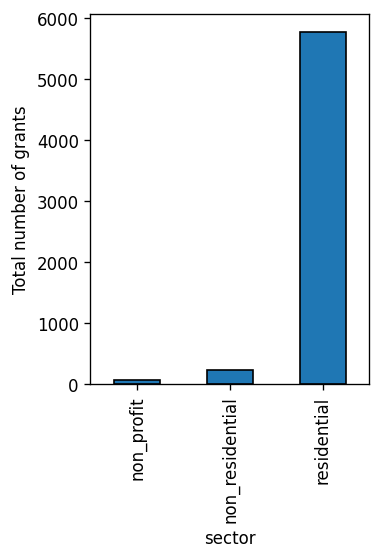

In [85]:
plt.figure(figsize=(3,4),dpi=120)
GEPG_PV_df['sector'].value_counts().sort_index().plot.bar(edgecolor='black')
plt.ylabel('Total number of grants')

Text(0.5, 1.0, 'Total number of grants')

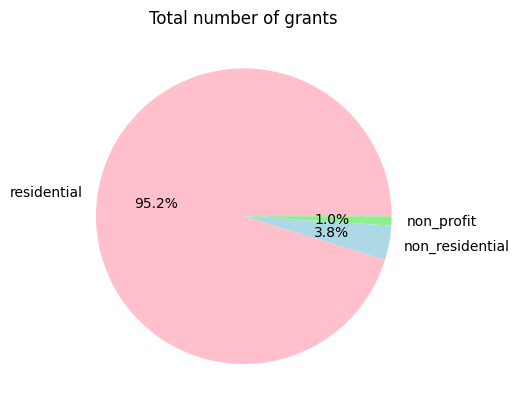

In [86]:
labels = GEPG_PV_df['sector'].unique()
sizes = GEPG_PV_df['sector'].value_counts()
colors = ['pink','lightblue','lightgreen']
fig,ax = plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%',colors=colors);
plt.title('Total number of grants')

Text(0, 0.5, 'Total value of rebates ($)')

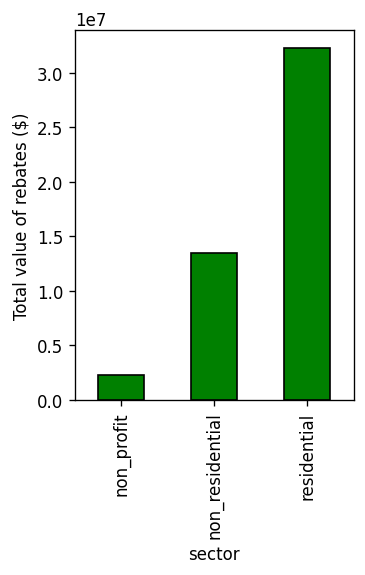

In [87]:
plt.figure(figsize=(3,4),dpi=120)
GEPG_PV_df.groupby(by='sector')['total_rebate'].sum().sort_index().plot.bar(facecolor='green',edgecolor='black')
plt.ylabel('Total value of rebates ($)')

Text(0, 0.5, 'Total capacity (kW)')

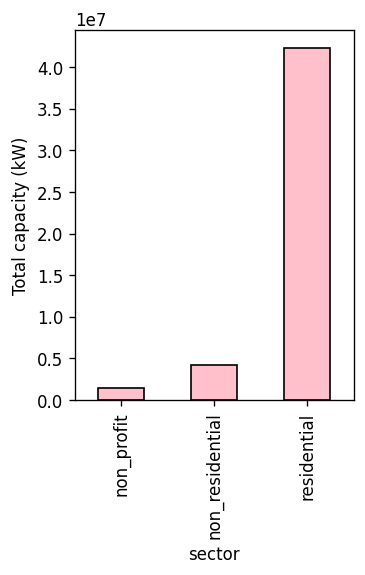

In [88]:
plt.figure(figsize=(3,4),dpi=120)
GEPG_PV_df.groupby(by='sector')['pv_capacity_kw'].sum().sort_index().plot.bar(facecolor='pink',edgecolor='black')
plt.ylabel('Total capacity (kW)')

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


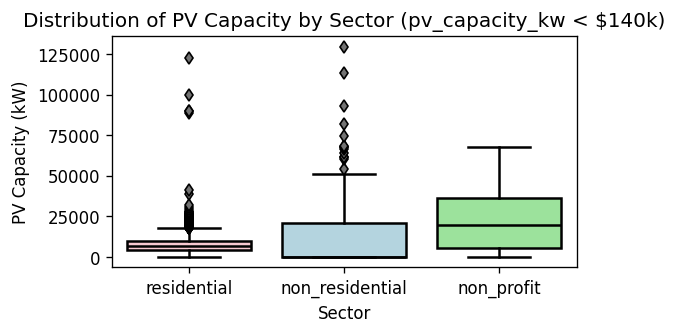

In [89]:
values_to_plot = GEPG_PV_df['sector'].unique()

# Filter the data to include only the values you want to plot
filtered_data = GEPG_PV_df[(GEPG_PV_df['pv_capacity_kw'] <= 140000) & (GEPG_PV_df['sector'].isin(values_to_plot))]

# Define custom colors for each sector
custom_palette = {'residential': 'pink', 'non_residential': 'lightblue', 'non_profit': 'lightgreen'}

# Create a box plot using Seaborn with custom colors for all elements
plt.figure(figsize=(5, 2.5), dpi=120)
ax = sns.boxplot(data=filtered_data, x='sector', y='pv_capacity_kw', palette=custom_palette, 
                 boxprops=dict(edgecolor='black'), flierprops=dict(markeredgecolor='black'),
                 whiskerprops=dict(color='black'), medianprops=dict(color='black'),
                 capprops=dict(color='black'))  # Set the color of whisker heads

ax.set_xlabel('Sector')  # Set x-axis label text
ax.set_ylabel('PV Capacity (kW)')  # Set y-axis label text
ax.set_title('Distribution of PV Capacity by Sector (pv_capacity_kw < $140k)')

# Set the text color for labels and title to black
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.title.set_color('black')

# Customize tick label colors
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# Draw a black frame around the plot area
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')

## Grants per Year

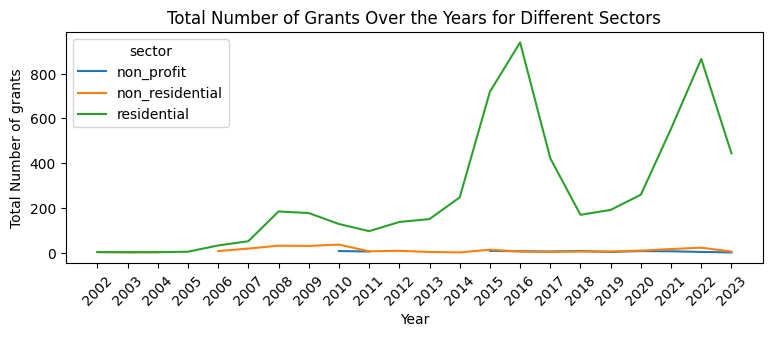

In [90]:
values_to_plot = ['residential', 'non_residential', 'non_profit']
data = GEPG_PV_df[GEPG_PV_df['sector'].isin(values_to_plot)].groupby(['year', 'sector']).size().unstack('sector')
data.plot.line(figsize=(9,3))
years = data.index.tolist()
plt.xticks(range(len(years)), years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Number of grants')
plt.title('Total Number of Grants Over the Years for Different Sectors');

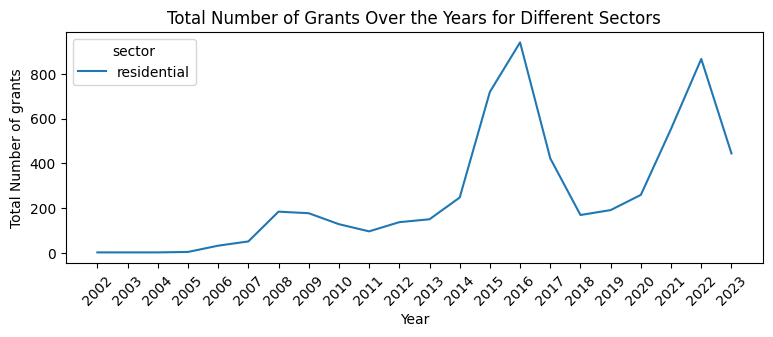

In [91]:
values_to_plot = ['residential']
data = GEPG_PV_df[GEPG_PV_df['sector'].isin(values_to_plot)].groupby(['year', 'sector']).size().unstack('sector')
data.plot.line(figsize=(9,3))
years = data.index.tolist()
plt.xticks(range(len(years)), years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Number of grants')
plt.title('Total Number of Grants Over the Years for Different Sectors');

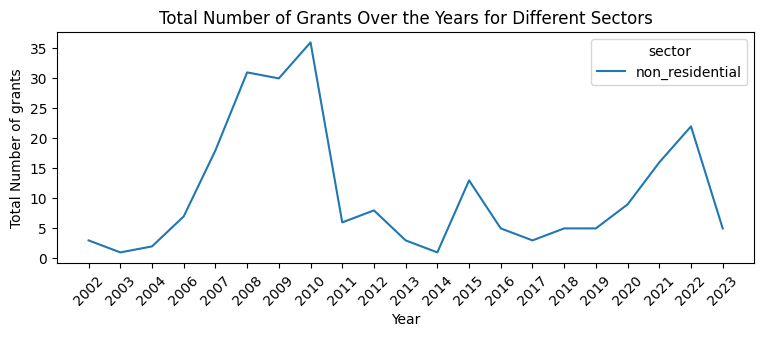

In [92]:
values_to_plot = ['non_residential']
data = GEPG_PV_df[GEPG_PV_df['sector'].isin(values_to_plot)].groupby(['year', 'sector']).size().unstack('sector')
data.plot.line(figsize=(9,3))
years = data.index.tolist()
plt.xticks(range(len(years)), years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Number of grants')
plt.title('Total Number of Grants Over the Years for Different Sectors');

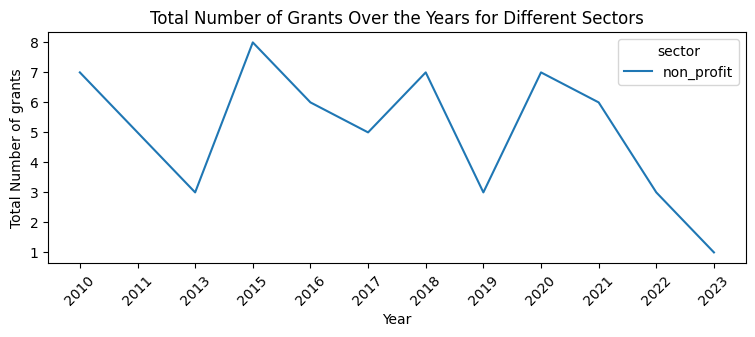

In [93]:
values_to_plot = ['non_profit']
data = GEPG_PV_df[GEPG_PV_df['sector'].isin(values_to_plot)].groupby(['year', 'sector']).size().unstack('sector')
data.plot.line(figsize=(9,3))
years = data.index.tolist()
plt.xticks(range(len(years)), years, rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Number of grants')
plt.title('Total Number of Grants Over the Years for Different Sectors');

### Using Seaborn

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

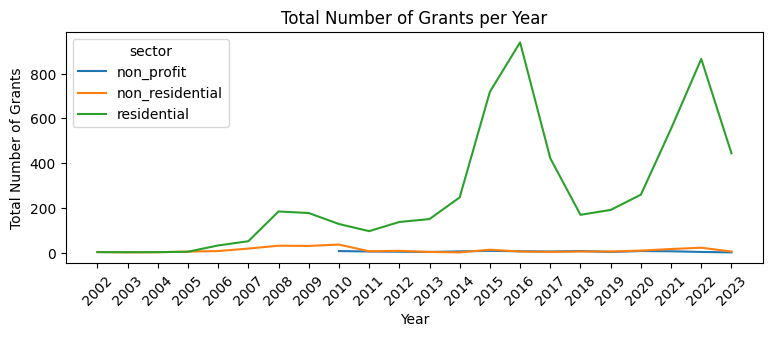

In [94]:
values_to_plot = ['residential', 'non_residential', 'non_profit']

# Filter and group the data, then reshape it
data = GEPG_PV_df[GEPG_PV_df['sector'].isin(values_to_plot)].groupby(['year', 'sector']).size().unstack('sector')

# Create a line plot using Seaborn
plt.figure(figsize=(9, 3))  # Adjust the figure size as needed

sns.lineplot(data=data, dashes=False)

plt.xlabel('Year')
plt.ylabel('Total Number of Grants')
plt.title('Total Number of Grants per Year')

plt.xticks(rotation=45);

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_82835/1842924217.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='year', y='total_rebate', hue='sector', estimator='sum', ci=None)
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

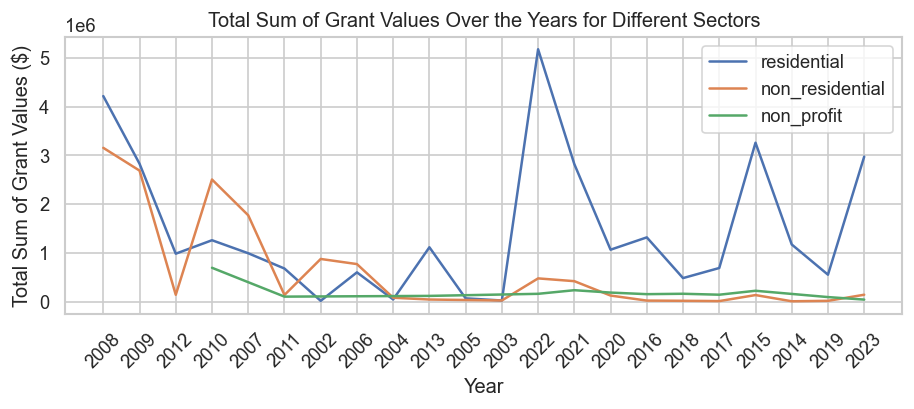

In [95]:
values_to_plot = ['residential', 'non_residential', 'non_profit']

data = GEPG_PV_df[GEPG_PV_df['sector'].isin(values_to_plot)]

sns.set(style="whitegrid")
plt.figure(figsize=(9, 3),dpi=120) 

sns.lineplot(data=data, x='year', y='total_rebate', hue='sector', estimator='sum', ci=None)
plt.legend(loc=0)
plt.xlabel('Year')
plt.ylabel('Total Sum of Grant Values ($)')
plt.title('Total Sum of Grant Values Over the Years for Different Sectors')

plt.xticks(rotation=45);

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

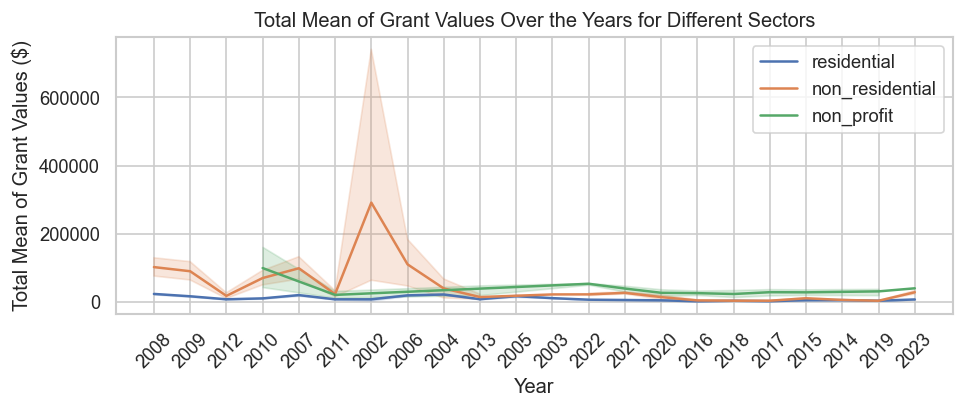

In [96]:
values_to_plot = ['residential', 'non_residential', 'non_profit']

data = GEPG_PV_df[GEPG_PV_df['sector'].isin(values_to_plot)]

sns.set(style="whitegrid")
plt.figure(figsize=(9, 3),dpi=120) 

sns.lineplot(data=data, x='year', y='total_rebate', hue='sector', estimator='mean')
plt.legend(loc=0)
plt.xlabel('Year')
plt.ylabel('Total Mean of Grant Values ($)')
plt.title('Total Mean of Grant Values Over the Years for Different Sectors')

plt.xticks(rotation=45);

In the previous plot, instead of including confidence interval, we can include standard deviation like this:

```python
# Calculate the mean and standard deviation for each group
mean_data = data.groupby(['year', 'sector'])['total_rebate'].mean().reset_index()
std_data = data.groupby(['year', 'sector'])['total_rebate'].std().reset_index()

# Plot the mean line
sns.lineplot(data=mean_data, x='year', y='total_rebate', hue='sector', estimator='mean', ci=None)

# Plot the standard deviation as shaded regions
plt.fill_between(std_data['year'], mean_data['total_rebate'] - std_data['total_rebate'], mean_data['total_rebate'] + std_data['total_rebate'], alpha=0.2)
```

### Discrete Data Exploration

<Axes: ylabel='Frequency'>

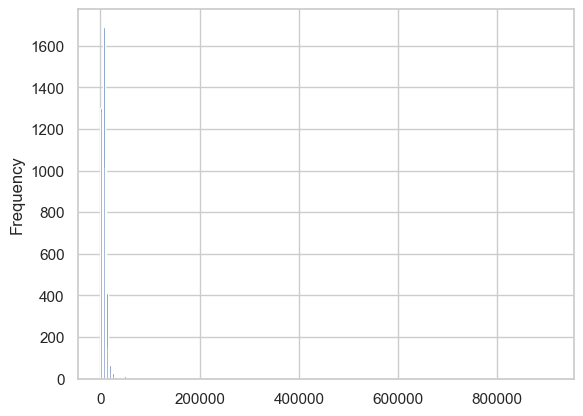

In [97]:
GEPG_PV_df['pv_capacity_kw'].plot.hist(bins=300)

<Axes: ylabel='Frequency'>

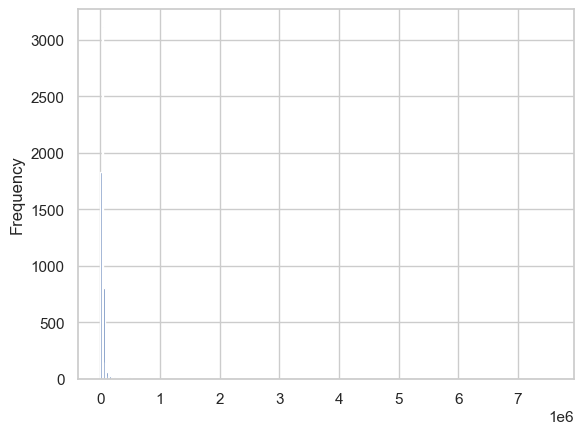

In [98]:
GEPG_PV_df['total_system_costs'].plot.hist(bins=300)

<Axes: ylabel='Frequency'>

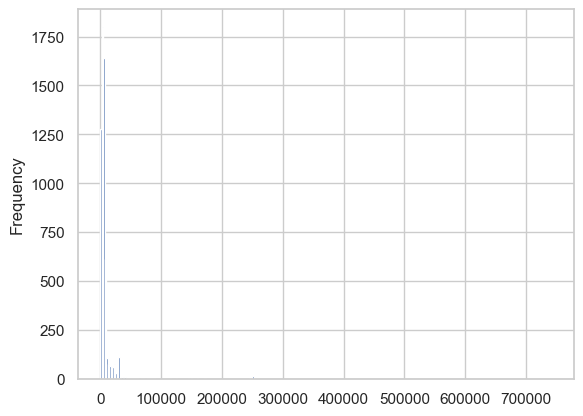

In [99]:
GEPG_PV_df['total_rebate'].plot.hist(bins=300)

<Axes: >

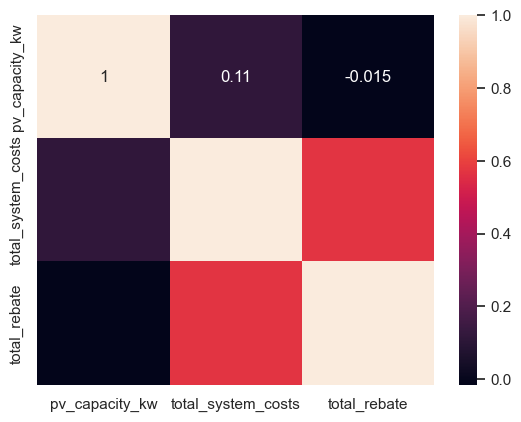

In [100]:
sns.heatmap(GEPG_PV_df[['pv_capacity_kw','total_system_costs','total_rebate']].corr(),annot=True)

<Axes: xlabel='payment_status'>

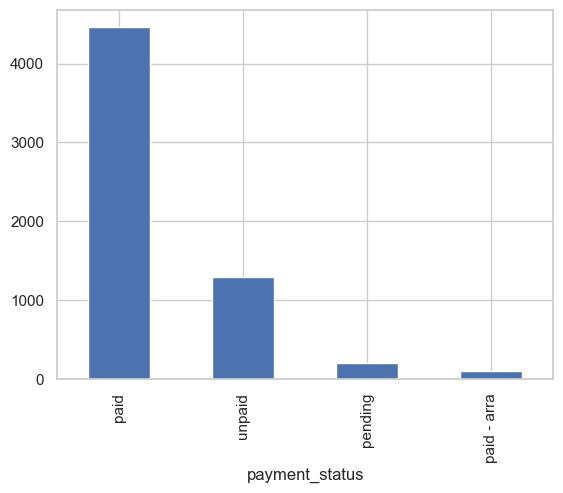

In [101]:
GEPG_PV_df['payment_status'].value_counts().plot.bar()

### Investigating correlation between total system consts and total rebate

We implement various methods to investigate this correlation

#### 1) Visualization

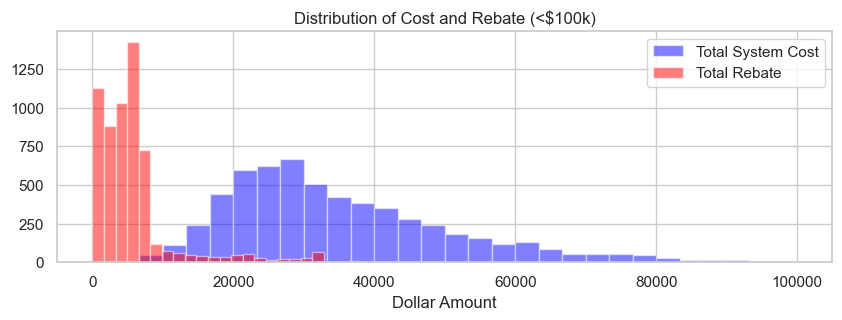

In [102]:
plt.figure(figsize=(10,3))
GEPG_PV_df[GEPG_PV_df['total_system_costs'].values < 100000]['total_system_costs'].hist(alpha=0.5,color='blue',bins=30,label='Total System Cost')
GEPG_PV_df[GEPG_PV_df['total_system_costs'].values < 100000]['total_rebate'].hist(alpha=0.5,color='red',bins=30,label='Total Rebate')
plt.legend()
plt.xlabel('Dollar Amount')
plt.title('Distribution of Cost and Rebate (<$100k)');

#### 2) Scatter Plot

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a 

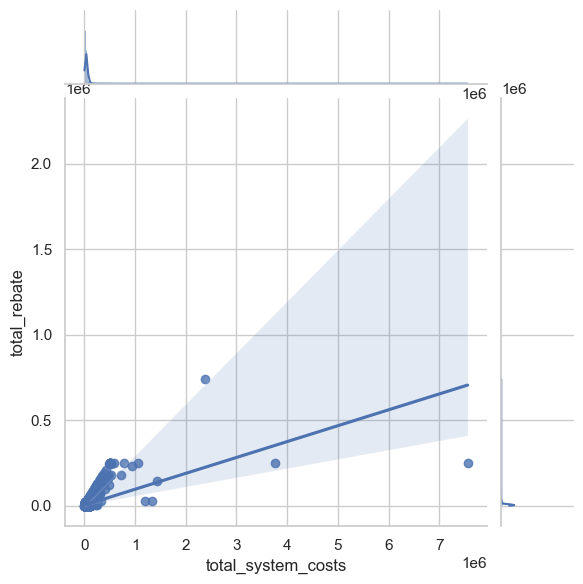

In [103]:
sns.jointplot(data=GEPG_PV_df,x='total_system_costs',y='total_rebate',kind='reg')

In [104]:
GEPG_PV_df['total_system_costs'].sort_values(ascending=False)

1223    7559000.00
1213    3762616.00
1212    2383225.00
1211    1440000.00
6161    1324900.00
           ...    
0          3194.67
1          3000.00
1207       1000.00
1635         40.00
1210          4.00
Name: total_system_costs, Length: 6066, dtype: float64

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a 

R-squared: 0.11


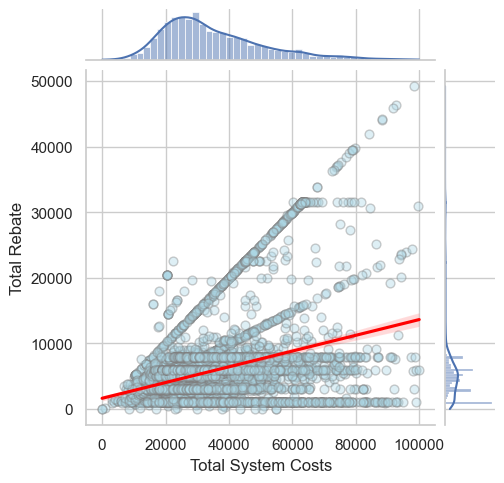

In [105]:
# Filter the data
filtered_data = GEPG_PV_df[GEPG_PV_df['total_system_costs'].values < 100000]

# Create a scatter plot with a regression line and custom figure size
plot = sns.jointplot(
    data=filtered_data,
    x='total_system_costs',
    y='total_rebate',
    kind='reg',
    line_kws={"color": "red"},          # Specify color for the regression line
    scatter_kws={
        "color": "lightblue",                # Specify color for the scatter points
        "s": 40,                        # Adjust the size of the scatter points
        "edgecolor": "gray",           # Add a black border around the markers
        "alpha": 0.4                    # Add transparency to the markers (0.0 to 1.0)
    },
    height=5,                           # Specify the height of the figure
    ratio=6                             # Specify the aspect ratio of the figure
)
plt.xlabel('Total System Costs')
plt.ylabel('Total Rebate')

# Calculate the R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_data['total_system_costs'], filtered_data['total_rebate'])
r_squared = r_value**2

# Display the R-squared value
print(f'R-squared: {r_squared:.2f}')

# Saving the figure with higher resolution
# dpi = 300  
# plot.savefig('scatter_plot.png', dpi=dpi)


I will start by finding high-frequency total_rebate values. 

Then I will focus on high correlation values.

<Axes: ylabel='Frequency'>

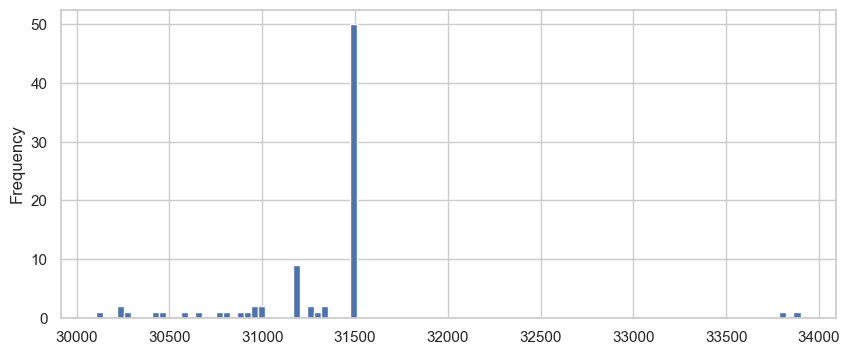

In [106]:
filtered_data[(filtered_data['total_rebate'] > 30000) & (filtered_data['total_rebate'] < 35000)]['total_rebate'].plot.hist(bins=100,figsize=(10,4))

In [107]:
# Define the conditions for datasets to include in the first DataFrame
conditions_include = [
    filtered_data['total_rebate'] == 0,
    filtered_data['total_rebate'] == 1000,
    filtered_data['total_rebate'] == 3000,
    filtered_data['total_rebate'] == 3300,
    filtered_data['total_rebate'] == 4375,
    filtered_data['total_rebate'] == 4750,
    filtered_data['total_rebate'] == 5000,
    filtered_data['total_rebate'] == 5250,
    filtered_data['total_rebate'] == 6000,
    filtered_data['total_rebate'] == 8000,
    filtered_data['total_rebate'] == 31500,
    filtered_data['total_system_costs'].between(1.99 * filtered_data['total_rebate'], 2.01 * filtered_data['total_rebate']),
    filtered_data['total_system_costs'].between(3.99 * filtered_data['total_rebate'], 4.01 * filtered_data['total_rebate']),
    filtered_data['total_system_costs'].between(0.99 * filtered_data['total_rebate'], 1.01 * filtered_data['total_rebate']),
    filtered_data['total_system_costs'].between((1.5/2.0) * filtered_data['total_rebate'], (1.5/2.0 + 0.5) * filtered_data['total_rebate'])
]

# Combine the conditions using logical OR (|) to create the inclusion condition
include_condition = np.any(conditions_include, axis=0)

# Create the first DataFrame with all the specified datasets
high_corr_df = filtered_data[include_condition]

# Create the second DataFrame without the specified datasets
low_corr_df = filtered_data[~include_condition]


In [108]:
print(len(high_corr_df))
print(len(low_corr_df))

3194
2691


/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

Text(22.375, 0.5, 'Total Rebate')

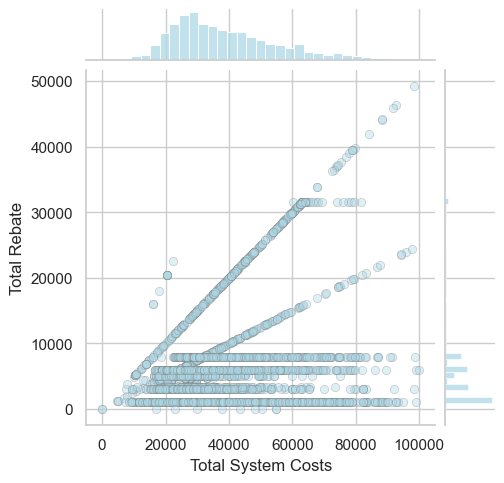

In [110]:
# Create a scatter plot without a regression line
plot = sns.jointplot(
    data=high_corr_df,
    x='total_system_costs',
    y='total_rebate',
    kind='scatter',  # Use 'scatter' to create a scatter plot without the regression line
    height=5,  # Specify the height of the figure
    ratio=6,  # Specify the aspect ratio of the figure
    alpha=0.4,
    color = 'lightblue',
    edgecolor = 'gray')

plt.xlabel('Total System Costs')
plt.ylabel('Total Rebate')


/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a 

R-squared: 0.22


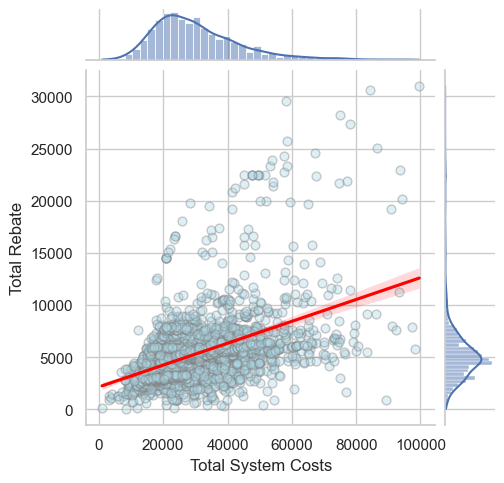

In [112]:
# Create a scatter plot with a regression line and custom figure size
plot = sns.jointplot(
    data=low_corr_df,
    x='total_system_costs',
    y='total_rebate',
    kind='reg',
    line_kws={"color": "red"},          # Specify color for the regression line
    scatter_kws={
        "color": "lightblue",                # Specify color for the scatter points
        "s": 40,                        # Adjust the size of the scatter points
        "edgecolor": "gray",           # Add a black border around the markers
        "alpha": 0.4                    # Add transparency to the markers (0.0 to 1.0)
    },
    height=5,                           # Specify the height of the figure
    ratio=6                             # Specify the aspect ratio of the figure
)
plt.xlabel('Total System Costs')
plt.ylabel('Total Rebate')

# Calculate the R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(low_corr_df['total_system_costs'], low_corr_df['total_rebate'])
r_squared = r_value**2

# Display the R-squared value
print(f'R-squared: {r_squared:.2f}')

# Saving the figure with higher resolution
# dpi = 300  
# plot.savefig('scatter_plot.png', dpi=dpi)


In [113]:
high_corr_df['sector'].value_counts()

sector
residential        3126
non_residential      62
non_profit            6
Name: count, dtype: int64

In [114]:
low_corr_df['sector'].value_counts()

sector
residential        2624
non_residential      41
non_profit           26
Name: count, dtype: int64

#### 3) Correlation Coefficient

In [115]:
df = GEPG_PV_df[GEPG_PV_df['total_system_costs'].values < 100000]
correlation_coefficient = df['total_system_costs'].corr(df['total_rebate'])
print(f"Pearson's Correlation Coefficient: {correlation_coefficient}")

Pearson's Correlation Coefficient: 0.3299570644427564


A correlation coefficient close to 1 or -1 indicates a strong correlation (positive or negative), while a value close to 0 suggests a weak or no linear correlation.

#### 4) Regression Analysis

##### Method 1: Using statsmodels

In [116]:
import statsmodels.api as sm

# Filter the data
filtered_data = GEPG_PV_df[GEPG_PV_df['total_system_costs'].values < 100000]

# Define the dependent (target) variable and independent (predictor) variable
X = filtered_data['total_system_costs']
y = filtered_data['total_rebate']

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           total_rebate   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     718.7
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          1.77e-149
Time:                        09:31:26   Log-Likelihood:                -59053.
No. Observations:                5885   AIC:                         1.181e+05
Df Residuals:                    5883   BIC:                         1.181e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1637.0791    172

##### Method 2: Using scikit-learn

In [117]:
from sklearn.linear_model import LinearRegression

# Filter the data
filtered_data = GEPG_PV_df[GEPG_PV_df['total_system_costs'].values < 100000]

# Define the dependent (target) variable and independent (predictor) variable
X = filtered_data['total_system_costs'].values.reshape(-1, 1)
y = filtered_data['total_rebate']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

# Predict using the model
predictions = model.predict(X)


Intercept: 1637.0791045007545
Coefficient: 0.12003992644671783


#### 5) Time-Series Analysis

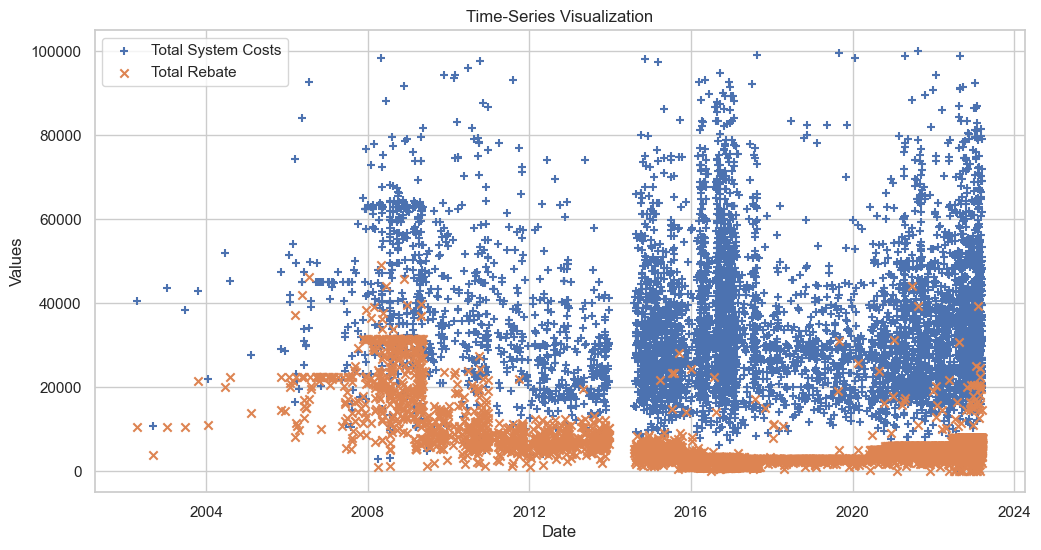

In [118]:
# Create a time-series plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data['date'], filtered_data['total_system_costs'], label='Total System Costs', marker='+')
plt.scatter(filtered_data['date'], filtered_data['total_rebate'], label='Total Rebate', marker='x')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time-Series Visualization')
plt.legend()

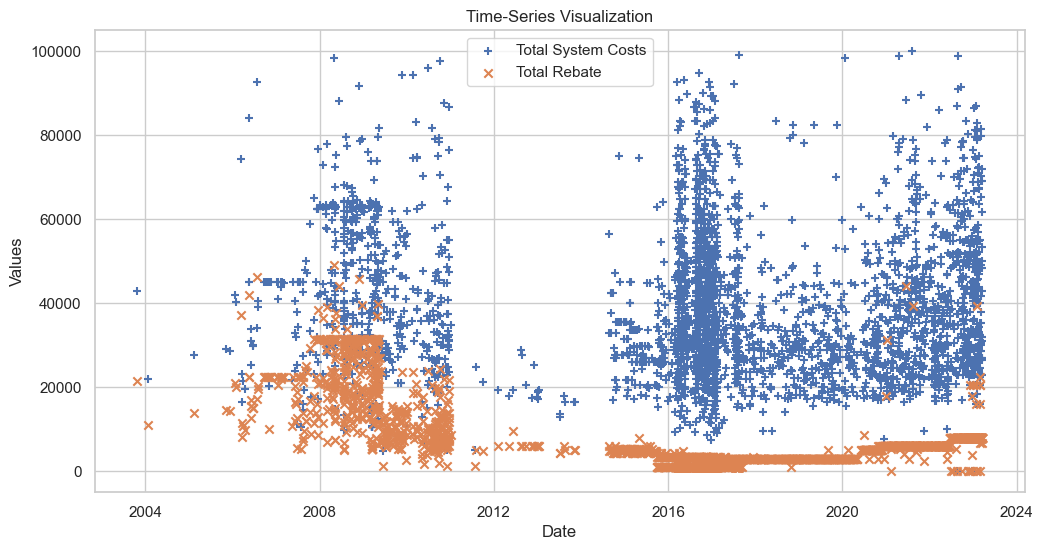

In [119]:
# Create a time-series plot
plt.figure(figsize=(12, 6))
plt.scatter(high_corr_df['date'], high_corr_df['total_system_costs'], label='Total System Costs', marker='+')
plt.scatter(high_corr_df['date'], high_corr_df['total_rebate'], label='Total Rebate', marker='x')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time-Series Visualization')
plt.legend()

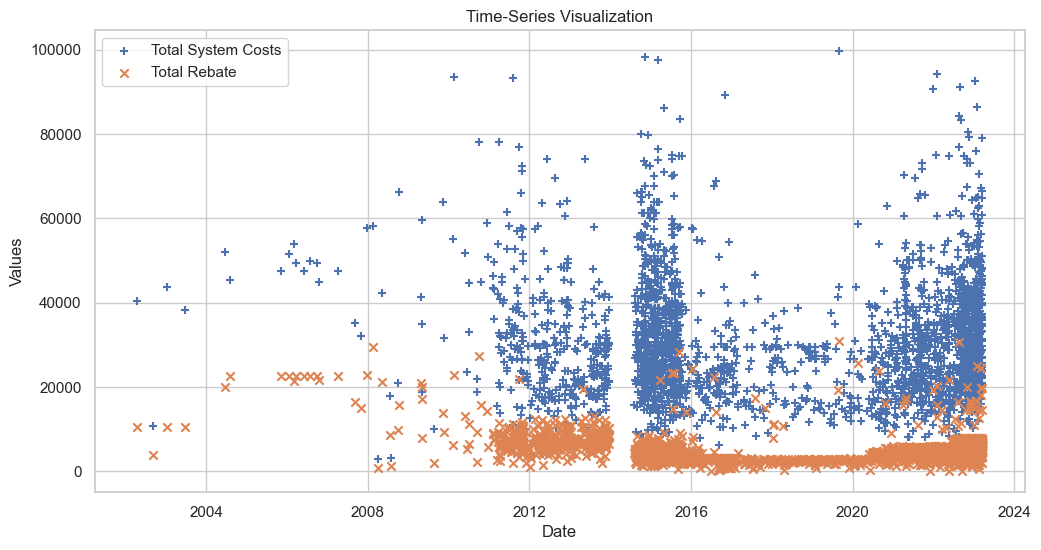

In [120]:
# Create a time-series plot
plt.figure(figsize=(12, 6))
plt.scatter(low_corr_df['date'], low_corr_df['total_system_costs'], label='Total System Costs', marker='+')
plt.scatter(low_corr_df['date'], low_corr_df['total_rebate'], label='Total Rebate', marker='x')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time-Series Visualization')
plt.legend()

In [121]:
filtered_data2 = filtered_data[(filtered_data['date'] > '2013-12-01') & (filtered_data['date'] < '2014-09-01')]

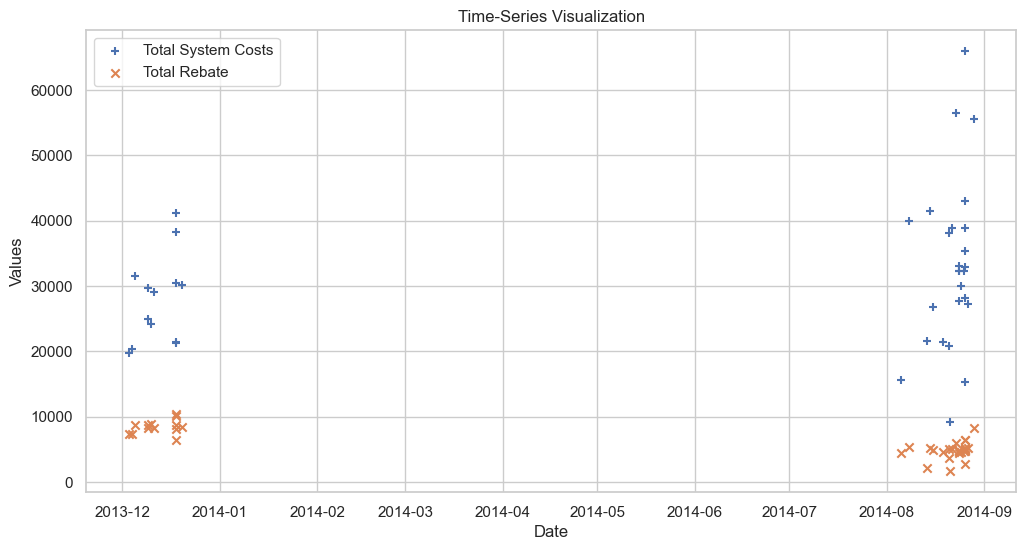

In [122]:
# Create a time-series plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data2['date'], filtered_data2['total_system_costs'], label='Total System Costs', marker='+')
plt.scatter(filtered_data2['date'], filtered_data2['total_rebate'], label='Total Rebate', marker='x')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time-Series Visualization')
plt.legend()

In [123]:
filtered_data2 = GEPG_df[(GEPG_df['date'] > '2013-12-01') & (GEPG_df['date'] < '2014-09-01')]

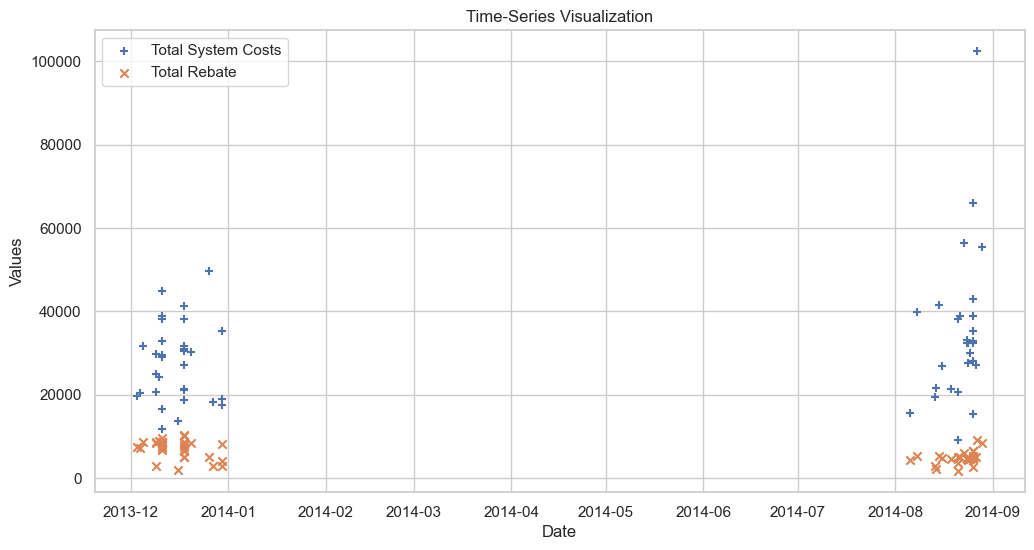

In [124]:
# Create a time-series plot
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data2['date'], filtered_data2['total_system_costs'], label='Total System Costs', marker='+')
plt.scatter(filtered_data2['date'], filtered_data2['total_rebate'], label='Total Rebate', marker='x')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time-Series Visualization')
plt.legend()

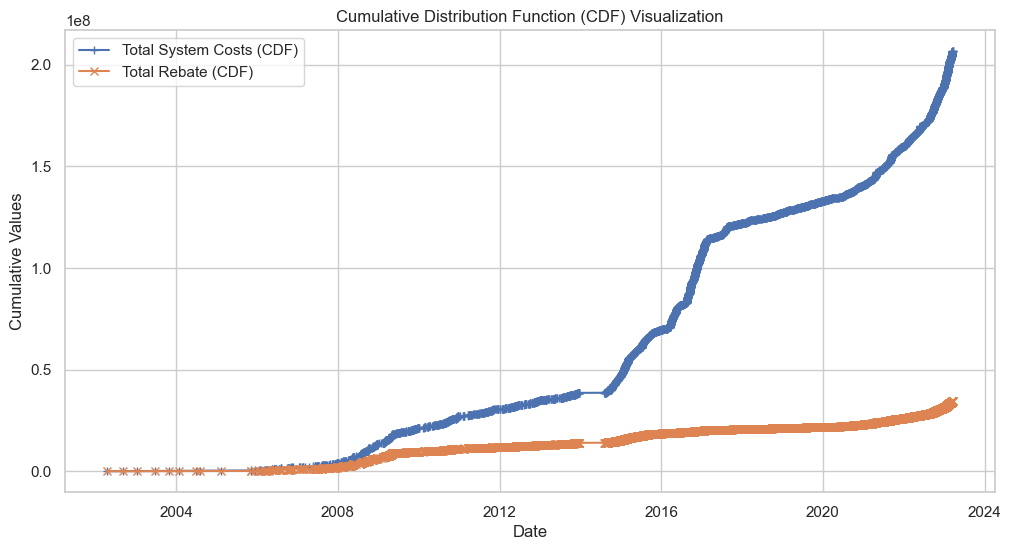

In [125]:
filtered_data = filtered_data.sort_values(by='date')
# Calculate the CDF of 'total_system_costs' and 'total_rebate'
total_system_costs_cdf = np.cumsum(filtered_data['total_system_costs'])
total_rebate_cdf = np.cumsum(filtered_data['total_rebate'])

# Create a time-series plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['date'], total_system_costs_cdf, label='Total System Costs (CDF)', marker='+')
plt.plot(filtered_data['date'], total_rebate_cdf, label='Total Rebate (CDF)', marker='x')
plt.xlabel('Date')
plt.ylabel('Cumulative Values')
plt.title('Cumulative Distribution Function (CDF) Visualization')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()

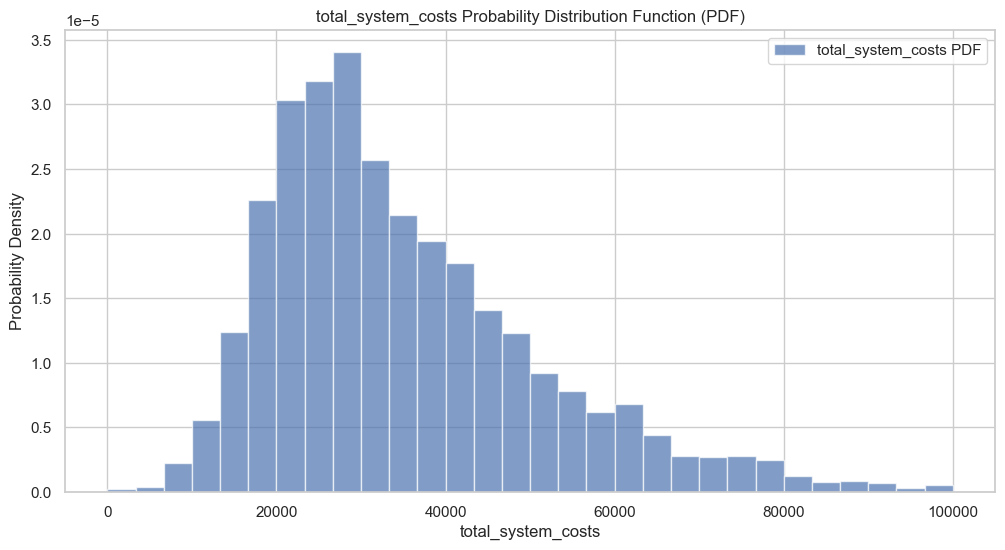

In [126]:
# Select the column for which you want to create the PDF (e.g., 'total_system_costs')
column_name = 'total_system_costs'

# Create a histogram to estimate the PDF
plt.figure(figsize=(12, 6))
plt.hist(filtered_data[column_name], bins=30, density=True, alpha=0.7, color='b', label=f'{column_name} PDF')

# Customize plot labels and title
plt.xlabel(column_name)
plt.ylabel('Probability Density')
plt.title(f'{column_name} Probability Distribution Function (PDF)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Add a grid for better readability

/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/kamran/anaconda3/envs/pygris/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

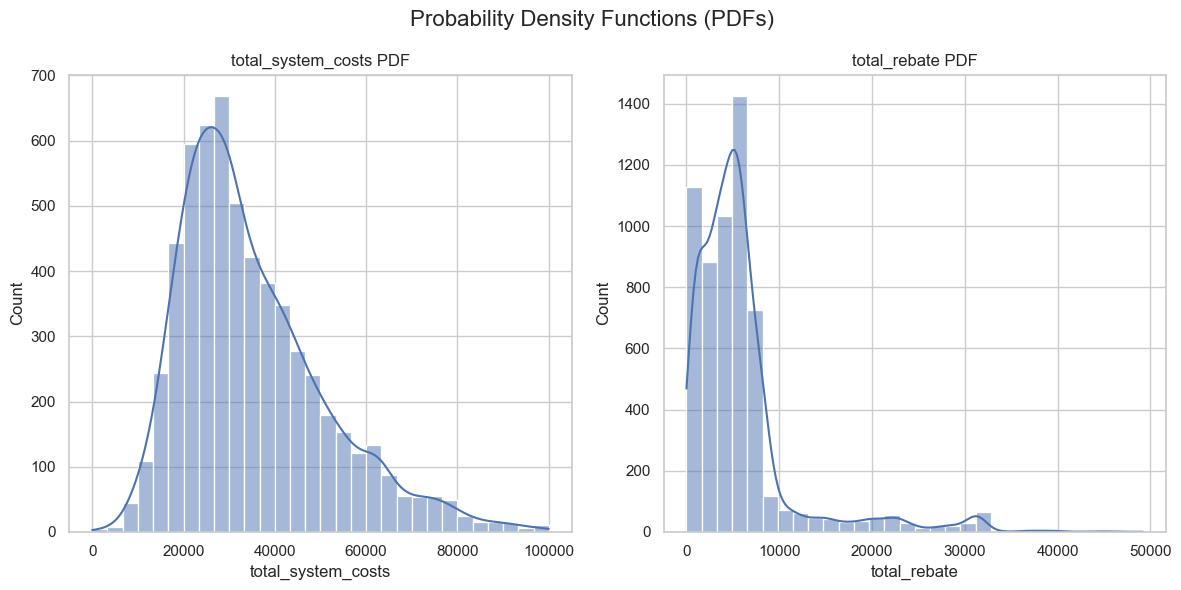

In [127]:
# Select the columns you want to plot
columns_to_plot = ['total_system_costs', 'total_rebate']

# Create subplots for each column
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(12, 6))

# Plot PDFs using seaborn for each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(filtered_data[column], kde=True, ax=axes[i], color='b', bins=30)
    axes[i].set_title(f'{column} PDF')

# Set common labels and title
# plt.xlabel('Values')
# plt.ylabel('Probability Density')
plt.suptitle('Probability Density Functions (PDFs)', fontsize=16)

# Adjust layout and display plots
plt.tight_layout()

In [128]:
# Calculate mean and median by month
annual_mean = filtered_data.resample('Y', on='date')['total_rebate'].mean()

In [129]:
annual_mean

date
2002-12-31     7141.115000
2003-12-31    14144.000000
2004-12-31    17839.420000
2005-12-31    16306.125000
2006-12-31    20671.362222
2007-12-31    19241.152679
2008-12-31    23643.438737
2009-12-31    16187.384731
2010-12-31    10324.160845
2011-12-31     7163.280612
2012-12-31     7169.285461
2013-12-31     7429.981788
2014-12-31     4723.092591
2015-12-31     4676.985274
2016-12-31     1470.098936
2017-12-31     1713.320546
2018-12-31     3016.139831
2019-12-31     3105.372727
2020-12-31     4379.818160
2021-12-31     5361.832004
2022-12-31     6122.781170
2023-12-31     6867.837838
Freq: A-DEC, Name: total_rebate, dtype: float64

In [130]:
monthly_mean_2 = filtered_data.groupby('month')['total_rebate'].mean()
monthly_median_2 = filtered_data.groupby('month')['total_rebate'].median()

In [131]:
monthly_mean_2

month
01    4963.692244
02    6266.160832
03    6033.723074
04    6319.281061
05    6714.759143
06    5869.286229
07    6462.244797
08    5678.848264
09    4987.630474
10    5808.575309
11    5391.378579
12    6305.570968
Name: total_rebate, dtype: float64

In [132]:
monthly_median_2

month
01    4556.250
02    5328.000
03    5062.500
04    4683.750
05    4755.000
06    4895.000
07    5000.000
08    4715.000
09    4388.875
10    4750.000
11    4640.250
12    4687.500
Name: total_rebate, dtype: float64

**Note: We will expand upon TSA in modeling code.**

#### 6) Feature Engineering

In [133]:
GEPG_PV_df['Rebate to Cost Ratio'] = GEPG_PV_df['total_rebate'] / GEPG_PV_df['total_system_costs']

/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_82835/1431285818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GEPG_PV_df['Rebate to Cost Ratio'] = GEPG_PV_df['total_rebate'] / GEPG_PV_df['total_system_costs']


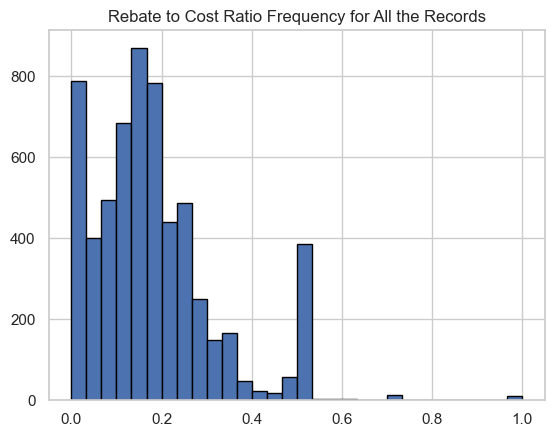

In [144]:
GEPG_PV_df['Rebate to Cost Ratio'].hist(bins=30,edgecolor='black')
plt.title('Rebate to Cost Ratio Frequency for All the Records');

Text(0.5, 1.0, 'Rebate to Cost Ratio Frequency Non-Profit and Non-Residential Sectors')

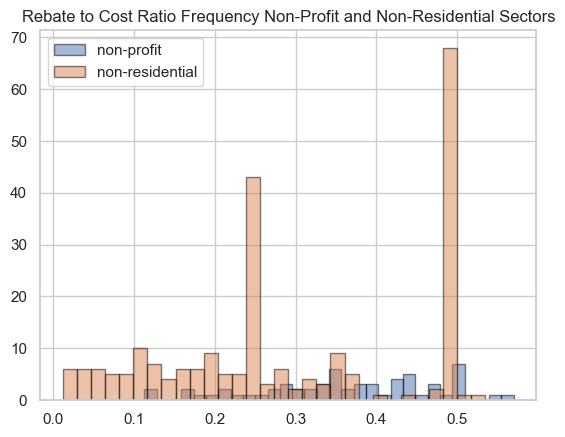

In [148]:
# GEPG_PV_df[GEPG_PV_df['sector']=='non_profit']['Rebate to Cost Ratio']
GEPG_PV_df[GEPG_PV_df['sector']=='non_profit']['Rebate to Cost Ratio'].hist(bins=30,edgecolor='black',alpha=0.5,label='non-profit');
GEPG_PV_df[GEPG_PV_df['sector']=='non_residential']['Rebate to Cost Ratio'].hist(bins=30,edgecolor='black',alpha=0.5,label='non-residential');
plt.legend()
plt.title('Rebate to Cost Ratio Frequency Non-Profit and Non-Residential Sectors')
# GEPG_PV_df[GEPG_PV_df['sector']=='residential']['Rebate to Cost Ratio'].hist(bins=30,edgecolor='black',alpha=0.2);

In [152]:
print("Non-Profit mean = ",round(GEPG_PV_df[GEPG_PV_df['sector']=='non_profit']['Rebate to Cost Ratio'].mean(),2))
print("Non-Profit std = ",round(GEPG_PV_df[GEPG_PV_df['sector']=='non_profit']['Rebate to Cost Ratio'].std(),2))

Non-Profit mean =  0.36
Non-Profit std =  0.11


In [153]:
print("Non-Residential mean = ",round(GEPG_PV_df[GEPG_PV_df['sector']=='non_residential']['Rebate to Cost Ratio'].mean(),2))
print("Non-Residential std = ",round(GEPG_PV_df[GEPG_PV_df['sector']=='non_residential']['Rebate to Cost Ratio'].std(),2))

Non-Residential mean =  0.3
Non-Residential std =  0.16


In [154]:
print("Residential mean = ",round(GEPG_PV_df[GEPG_PV_df['sector']=='residential']['Rebate to Cost Ratio'].mean(),2))
print("Residential std = ",round(GEPG_PV_df[GEPG_PV_df['sector']=='residential']['Rebate to Cost Ratio'].std(),2))

Residential mean =  0.17
Residential std =  0.13


In [159]:
## Calculating and comparing Z-Score

# Step 1: Data Preparation
non_profit_data = GEPG_PV_df[GEPG_PV_df['sector'] == 'non_profit']
non_residential_data = GEPG_PV_df[GEPG_PV_df['sector'] == 'non_residential']

# Step 2: Z-Score Calculation
def calculate_z_scores(data):
    data_mean = data['Rebate to Cost Ratio'].mean()
    data_std = data['Rebate to Cost Ratio'].std()
    data['Z-Score'] = (data['Rebate to Cost Ratio'] - data_mean) / data_std
    return data

non_profit_data = calculate_z_scores(non_profit_data)
non_residential_data = calculate_z_scores(non_residential_data)

# Step 3: Comparison
non_profit_mean_z = non_profit_data['Z-Score'].mean()
non_residential_mean_z = non_residential_data['Z-Score'].mean()

print("Z-Score Mean (Non-Profit):", round(non_profit_mean_z, 6))
print("Z-Score Mean (Non-Residential):", round(non_residential_mean_z, 6))


Z-Score Mean (Non-Profit): 0.0
Z-Score Mean (Non-Residential): 0.0


/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_82835/1884903746.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Z-Score'] = (data['Rebate to Cost Ratio'] - data_mean) / data_std
/var/folders/75/y16smf2j5032r_8n2vhxct6r0000gn/T/ipykernel_82835/1884903746.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Z-Score'] = (data['Rebate to Cost Ratio'] - data_mean) / data_std


In [163]:
non_profit_data['Z-Score'].sort_values()

1120   -2.312412
1146   -2.264269
719    -1.764997
6093   -1.752329
6065   -1.699631
          ...   
5820    1.254167
4127    1.254167
6099    1.254167
1132    1.642399
995     1.900788
Name: Z-Score, Length: 61, dtype: float64

In [160]:
non_profit_mean_z

1.024681250596661e-15

In [161]:
non_residential_mean_z

4.3439293889263765e-16

In [164]:
# Data prepatation
non_profit_data = GEPG_PV_df[GEPG_PV_df['sector'] == 'non_profit']['Rebate to Cost Ratio']
non_residential_data = GEPG_PV_df[GEPG_PV_df['sector'] == 'non_residential']['Rebate to Cost Ratio']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(non_profit_data, non_residential_data)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in means.")


Reject the null hypothesis: There is a significant difference in means.
